--- STEP 1: LOADING & SLICING DATA ---
17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Total samples selected: 100
Training samples: 80
Testing samples: 20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)


--- STARTING TRAINING ---
Epoch 1/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.6301 - loss: 0.6930 - val_accuracy: 0.7000 - val_loss: 0.6800
Epoch 2/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.5124 - loss: 0.6852 - val_accuracy: 0.7000 - val_loss: 0.6725
Epoch 3/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.7262 - loss: 0.6247 - val_accuracy: 0.4000 - val_loss: 0.6959
Epoch 4/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step - accuracy: 0.9244 - loss: 0.6047 - val_accuracy: 0.5500 - val_loss: 0.7194
Epoch 5/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - accuracy: 0.9390 - loss: 0.4910 - val_accuracy: 0.6500 - val_loss: 0.6162
Epoch 6/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9647 - loss: 0.2055 - val_accuracy: 0.4000 - val_loss: 1.1892
Epoch 7/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 39ms/step - accuracy: 0.9213 - loss: 0.1787 - val_accuracy: 0.7500 - val_loss: 0.4107
Epoch 8/15
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step - accuracy: 0.9874 - loss: 0.0891

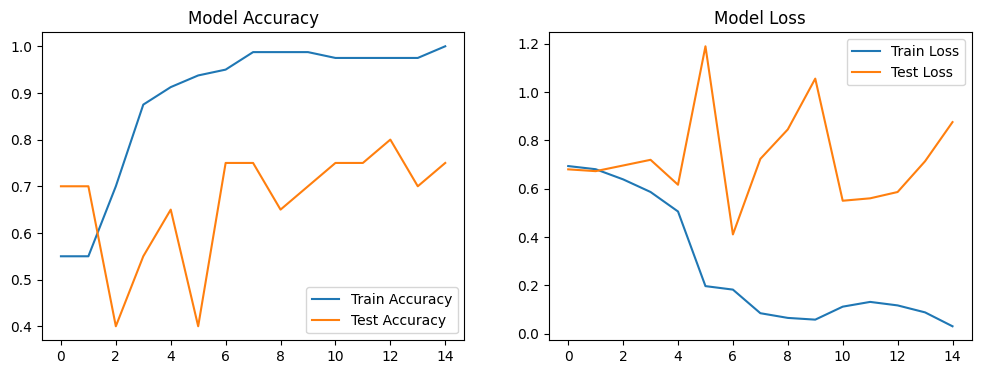


COPY THE DATA BELOW FOR TASK 2 (lab2_llama.py)
1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
[
  {
    "text": "? went to see this as me and my lady had little else to do on a sunday afternoon i like films that deal with sleazy loser characters and this is full of em after a slow start we get some good turns from the cast but it is the actual ? that both makes and lets the film down the ? is one of the funniest scenes i have seen in a film for a long while but is too short and could have made this a masterpiece overall ? 2 out of 10",
    "true_label": "Positive"
  },
  {
    "text": "? one of my best friends brought this movie over one night with the words ? watch the worst horror movie ever ' i always enjoy a good laugh at a bad horror flick and said yes i had expected your typical cheesy b slasher but this was beyond b this is z slasher the lowest of the low with obviously low budget extremely bad acting bad lightning no plot really bad so called ? ? shaky cameras and a horrible

In [ ]:
# ==========================================
# LAB EXERCISE 1: Train RNN on 100 IMDB Reviews
# ==========================================

import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
import matplotlib.pyplot as plt
import json

# --- CONFIGURATION ---
NUM_SAMPLES = 100        # User Request: Use only first 100 movies
VOCAB_SIZE = 10000       # Keep top 10,000 most frequent words
MAX_LENGTH = 100         # Pad/cut reviews to 100 words
TEST_SPLIT = 0.2         # 20% for testing (as per Lab requirements)

print("--- STEP 1: LOADING & SLICING DATA ---")
# [cite_start]1. Load the dataset (Downloads automatically if needed) [cite: 4]
# We load more initially to ensure we get valid sequences, then slice down to 100.
(x_train_all, y_train_all), (x_test_all, y_test_all) = imdb.load_data(num_words=VOCAB_SIZE)

# [cite_start]2. Combine and slice to get exactly 100 samples [cite: 5]
# Concatenate train and test to get a pool, then take the first 100
x_all = np.concatenate((x_train_all, x_test_all), axis=0)[:NUM_SAMPLES]
y_all = np.concatenate((y_train_all, y_test_all), axis=0)[:NUM_SAMPLES]

print(f"Total samples selected: {len(x_all)}")

# [cite_start]--- STEP 2: SPLIT DATASET (80% Train, 20% Test) [cite: 6-8] ---
split_index = int((1 - TEST_SPLIT) * len(x_all)) # 80 for training

x_train = x_all[:split_index]
y_train = y_all[:split_index]
x_test = x_all[split_index:]
y_test = y_all[split_index:]

print(f"Training samples: {len(x_train)}")
print(f"Testing samples: {len(x_test)}")

# [cite_start]--- STEP 3: PREPROCESS (PADDING) [cite: 10-12] ---
# Convert text sequences to same length (100 integers)
x_train_padded = pad_sequences(x_train, maxlen=MAX_LENGTH, padding='post', truncating='post')
x_test_padded = pad_sequences(x_test, maxlen=MAX_LENGTH, padding='post', truncating='post')

# [cite_start]--- STEP 4: BUILD THE RNN MODEL [cite: 13-17] ---
model = Sequential([
    Embedding(input_dim=VOCAB_SIZE, output_dim=32, input_length=MAX_LENGTH), # Embedding
    LSTM(64),                                                               # LSTM Layer
    Dense(1, activation='sigmoid')                                          # Final Output
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

# [cite_start]--- STEP 5: TRAIN THE MODEL [cite: 18-20] ---
print("\n--- STARTING TRAINING ---")
history = model.fit(
    x_train_padded, y_train,
    epochs=15,               # Training for 15 epochs
    batch_size=4,            # Small batch size for small dataset
    validation_data=(x_test_padded, y_test),
    verbose=1
)

# [cite_start]--- STEP 6: TEST THE MODEL [cite: 21-23] ---
print("\n--- FINAL EVALUATION ---")
loss, accuracy = model.evaluate(x_test_padded, y_test)
print(f"RNN Model Accuracy on {len(x_test)} Test Samples: {accuracy * 100:.2f}%")

# [cite_start]Plot Loss and Accuracy [cite: 20]
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.title('Model Loss')
plt.legend()
plt.show()

# ==========================================
# PREPARATION FOR TASK 2 (LLaMA COMPARISON)
# ==========================================
# This part decodes the numbers back to English text so you can use them
# with LLaMA on your laptop.

print("\n" + "="*50)
print("COPY THE DATA BELOW FOR TASK 2 (lab2_llama.py)")
print("="*50)

# Get the word index to decode reviews
word_index = imdb.get_word_index()
reverse_word_index = {value: key for key, value in word_index.items()}

def decode_review(text_seq):
    # Offset by 3 because 0, 1, 2 are reserved indices in IMDB dataset
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in text_seq])

task2_data = []
for i in range(len(x_test)):
    # Decode the review text
    review_text = decode_review(x_test[i])
    # Get the label name
    label_name = "Positive" if y_test[i] == 1 else "Negative"

    task2_data.append({
        "text": review_text,
        "true_label": label_name
    })

# Print nicely formatted JSON
print(json.dumps(task2_data, indent=2))